# TOWARDS A CLEAR UNDERSTANDING OF RURAL INTERNET: WHAT STATISTICAL MEASURES CAN BE USED TO ASSESS, COMPARE AND FORECAST INTERNET SPEEDS FOR RURAL CANADIAN COMMUNITIES?

The Government of Canada has committed to helping 95% of Canadian households and businesses access high-speed internet at minimum speeds of 50 Mbps download and 10 Mbps upload (hereinafter referred to as the “Commitment”) by 2026, and 100% by 2030. According to the CRTC, currently 45.6% of rural community households have access to the Commitment based on what’s available to them via an Internet Service Provider (e.g. Shaw, Telus, etc.) in their region, rather than what a rural household actually realizes at home in terms of internet speeds. 

https://ssc.ca/en/case-study/towards-a-clear-understanding-rural-internet-what-statistical-measures-can-be-used-assess

In [1]:
import sys
from google.colab import drive
drive.mount('/content/gdrive')
colab_dir = '/content/gdrive/My Drive/Colab_files/2022_CCS_case_study'
sys.path.append(colab_dir)

Mounted at /content/gdrive


In [3]:
%matplotlib inline
import tqdm
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
plt.style.use('seaborn')
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
pred_d = pd.read_csv(colab_dir+'/pred_d_ARIMA_2019_2030.csv')
pred_u = pd.read_csv(colab_dir+'/pred_u_ARIMA_2019_2030.csv')
display(pred_d.head(10))

,PRUID,CDUID,SACTYPE,is_rural,conn_type,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,...,2028Q3,2028Q4,2029Q1,2029Q2,2029Q3,2029Q4,2030Q1,2030Q2,2030Q3,2030Q4
0,10,1001,1,False,fixed,110.345156,119.111294,119.289840,133.982140,138.116998,...,207.525878,207.525878,207.525878,207.525878,207.525878,207.525878,207.525878,207.525878,207.525878,207.525878
1,10,1001,1,False,mobile,92.795777,87.178801,92.805750,107.989439,128.610736,...,142.639647,142.639647,142.639647,142.639647,142.639647,142.639647,142.639647,142.639647,142.639647,142.639647
2,10,1001,1,True,fixed,133.453020,128.895390,131.015521,134.125992,149.874709,...,206.357441,206.357441,206.357441,206.357441,206.357441,206.357441,206.357441,206.357441,206.357441,206.357441
3,10,1001,1,True,mobile,105.861625,95.234816,121.787400,89.496235,93.703684,...,142.689813,142.689813,142.689813,142.689813,142.689813,142.689813,142.689813,142.689813,142.689813,142.689813
4,10,1001,3,False,fixed,107.054376,113.256687,115.881391,123.307779,148.450455,...,230.701191,230.701191,230.701191,230.701191,230.701191,230.701191,230.701191,230.701191,230.701191,230.701191
5,10,1001,3,False,mobile,116.633000,3.018333,3.018333,213.846750,221.255000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
6,10,1001,3,True,fixed,117.389714,188.667167,145.094659,117.299247,158.412493,...,151.777022,151.777022,151.777022,151.777022,151.777022,151.777022,151.777022,151.777022,151.777022,151.777022
7,10,1001,3,True,mobile,86.814000,89.194564,100.149191,96.111320,12.912000,...,39.925223,39.925223,39.925223,39.925223,39.925223,39.925223,39.925223,39.925223,39.925223,39.925223
8,10,1001,4,False,fixed,6.694000,5.176333,4.408000,4.526000,4.425000,...,11.018836,11.018836,11.018836,11.018836,11.018836,11.018836,11.018836,11.018836,11.018836,11.018836
9,10,1001,4,False,mobile,89.507577,87.518054,91.207680,106.749923,126.957829,...,67.247489,67.484916,67.282643,67.453400,67.308124,67.430912,67.326551,67.414833,67.339853,67.403320


In [ ]:
# “Commitment”: minimum speeds of 50 Mbps download and 10 Mbps upload
# minimize profocit and maximize deficit at the end of 2026, 2030
#cmt = np.amin([df.avg_d_mbps_wt.values-50, df.avg_u_mbps_wt.values-10], axis=0)
df['commitment2021'] = np.amin([df.avg_d_mbps_wt.values-50, df.avg_u_mbps_wt.values-10], axis=0)
df['commitment2026'] = np.amin([df['avg_d_2026-q4'].values-50, df['avg_u_2026-q4'].values-10], axis=0)
df['commitment2030'] = np.amin([df['avg_d_2030-q4'].values-50, df['avg_u_2030-q4'].values-10], axis=0)

In [ ]:
df['c2026'] = 0
df.loc[(df['avg_d_2026-q4']>=50) & (df['avg_u_2026-q4']>=10), 'c2026'] = 1 
df['c2030'] = 0
df.loc[(df['avg_d_2030-q4']>=50) & (df['avg_u_2030-q4']>=10), 'c2030'] = 1 

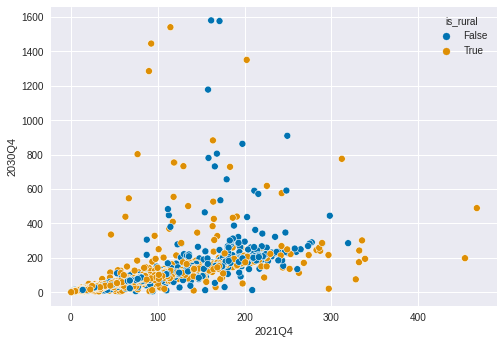

In [16]:
import seaborn as sns
sns.scatterplot(data=pred_d, x="2021Q4", y="2030Q4", hue="is_rural", palette='colorblind')

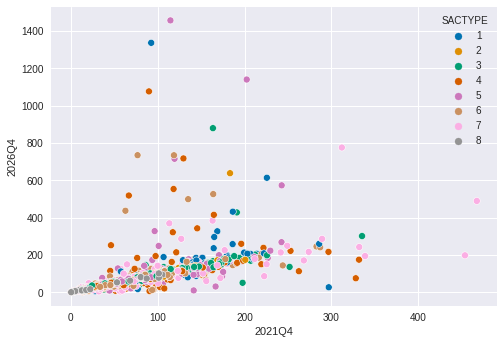

In [11]:
sns.scatterplot(data=pred_d[pred_d.is_rural], x="2021Q4", y="2026Q4",hue="SACTYPE", palette='colorblind',)

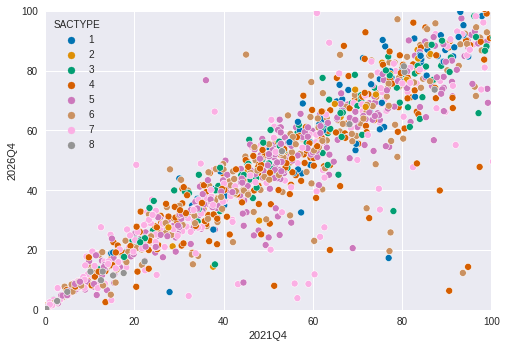

In [13]:
g = sns.scatterplot(data=pred_d[pred_d.is_rural], x="2021Q4", y="2026Q4",hue="SACTYPE", palette='colorblind',)
g.set(ylim=(0, 100), xlim=(0, 100))
g

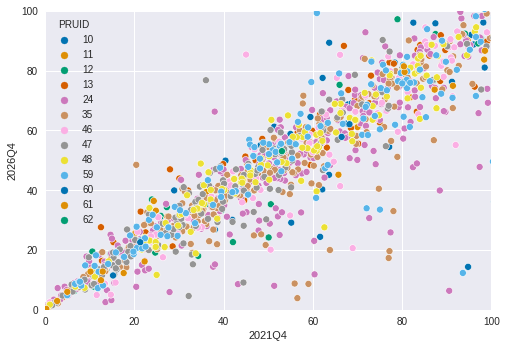

In [14]:
g = sns.scatterplot(data=pred_d[pred_d.is_rural], x="2021Q4", y="2026Q4",hue="PRUID", palette='colorblind',)
g.set(ylim=(0, 100), xlim=(0, 100))
g